In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab 
%matplotlib inline
import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [108]:
df=pd.read_csv('/content/framingham_preproc.csv')
df

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
3744     1   58              0         0.0     0.0                0   
3745     1   68              0         0.0     0.0                0   
3746     1   50              1         1.0     0.0                0   
3747     1   51              1        43.0     0.0                0   
3748     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
3744             1         0    187.0  141.0   81.0  24.96       80.0   
3745             1         0    176.0  168.0   97.0  23.14       60.0   
3746             1         0    313.0  179.0   92.0  25.97       66.0   
3747             0         0    207.0  126.5   80.0  19.71       65.0   
3748             0         0    269.0  133.5   83.0  21.47       80.0   

      glucose  TenYearCHD  
0        77.0           0  
1        76.0           0  
2        70.0           0  
3       103.0           1  
4        85.0           0  
...       ...         ...  
3744     81.0           0  
3745     79.0           1  
3746     86.0           1  
3747     68.0           0  
3748    107.0           0  

[3749 rows x 15 columns]

In [109]:
# we can drop education as it doesnt effect heart disease
#df = df.drop(['education'], axis=1)
df = df[['male','prevalentHyp', 'totChol', 'currentSmoker', 'diaBP', 'sysBP', 'age', 'TenYearCHD']]

In [110]:
df.to_csv(r'C:\Users\nbounas\Desktop\my_data.csv', index=False)

In [111]:
print(df.isnull().sum().sum())
df=df.dropna()
print(df.isnull().sum().sum())
df.shape

0
0


(3749, 8)

In [112]:
df.isna().sum()

male             0
prevalentHyp     0
totChol          0
currentSmoker    0
diaBP            0
sysBP            0
age              0
TenYearCHD       0
dtype: int64

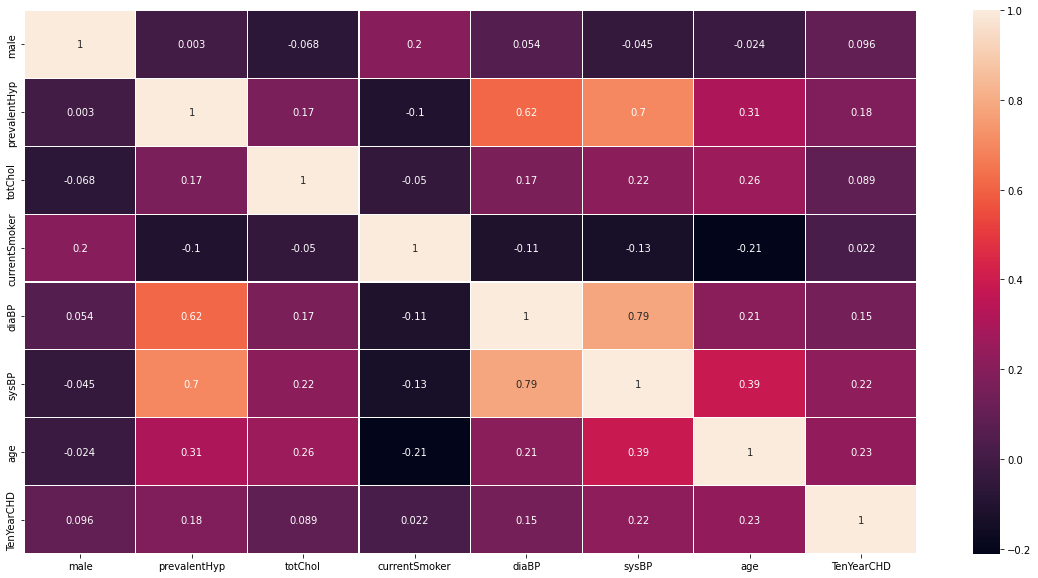

In [113]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.1,annot=True)
# linewidths is white space between boxes and annot gives value
plt.show()

In [114]:
df.to_csv(r'C:\\Users\\nbounas\\Desktop\\my_data.csv', index=False)

In [115]:
X = df.drop('TenYearCHD',1)
y = df.TenYearCHD

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

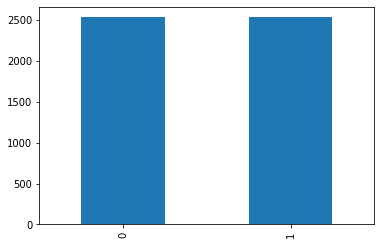

In [117]:
#Using SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X_train, y_train)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Accuracy with Logistic Regression: accuracy score: 84.93%
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       641
           1       0.17      0.01      0.02       109

    accuracy                           0.85       750
   macro avg       0.51      0.50      0.47       750
weighted avg       0.75      0.85      0.79       750



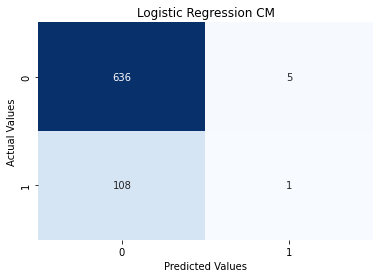

array([[636,   5],
       [108,   1]])

In [119]:

from sklearn.linear_model import LogisticRegression
skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=10)
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2', solver='liblinear')
scorer = make_scorer(average_precision_score)
result = cross_val_score(log_reg_classifier, X, y, cv = skfold, scoring=scorer)
log_reg_classifier.fit(X_train, y_train)
y_pred_log=log_reg_classifier.predict(X_test)
my_confusion_matrix(y_test, y_pred_log, 'Logistic Regression CM', 'Accuracy with Logistic Regression:')

In [120]:
# #from sklearn.linear_model import DecisionTreeClassifier
# skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=10)
# DecisionTreeClassifier=DecisionTreeClassifier()
# scorer = make_scorer(average_precision_score)
# result = cross_val_score(log_reg_classifier, X, y, cv = skfold, scoring=scorer)
# DecisionTreeClassifier.fit(X_ros, y_ros)
# y_pred_log=DecisionTreeClassifier.predict(X_test)
# my_confusion_matrix(y_test, y_pred_log, 'DecisionTreeClassifier CM', 'Accuracy with Logistic Regression:')

<!--  -->

In [121]:
# #from sklearn.linear_model import DecisionTreeClassifier
# skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=10)
# SVM=SVC()
# scorer = make_scorer(average_precision_score)
# result = cross_val_score(log_reg_classifier, X, y, cv = skfold, scoring=scorer)
# SVM.fit(X_ros, y_ros)
# y_pred_log=SVM.predict(X_test)
# my_confusion_matrix(y_test, y_pred_log, 'SVM CM', 'Accuracy with nSVM:')

In [122]:
classifiers = {
    "LogisticRegression": LogisticRegression(C= 0.1, penalty= 'l2', random_state= 40, solver='liblinear'),
    "LGBMClassifier": LGBMClassifier(n_estimators = 100, reg_alpha = 0.2, reg_lambda = 0.1, random_state=10 ),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(20),    
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators = 1000, random_state = 1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB(),
    "SVMClassification": SVC(C = 0.2, gamma = 0.01),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, random_state=7),
    "SGDClassifier": SGDClassifier(loss='modified_huber', shuffle=True, random_state= 1)
}

In [123]:

from numpy import mean
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])

for key in classifiers:

    print('*',key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(X_ros, y_ros)
    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
    scorer = make_scorer(average_precision_score)
    cv_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    accuracy = mean(cv_scores)
    print(accuracy)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100

    #classifier = svm.SVC()
    #model = classifier.fit(X_train, y_train)
    #y_pred = model.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    row = {'model': key,
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }
    df_result = df_result.append(row, ignore_index=True)
    #df_result.head()






* LogisticRegression
0.8546666666666667
* LGBMClassifier
0.8266666666666665
* XGBClassifier
0.8533333333333333
* KNeighborsClassifier
0.8546666666666667
* DecisionTreeClassifier
0.7666666666666666
* RandomForestClassifier
0.8466666666666667
* AdaBoostClassifier
0.8453333333333333
* GradientBoostingClassifier
0.8480000000000001
* GaussianNB
0.796
* SVMClassification
0.8546666666666667
* MLPClassifier
0.8373333333333335
* SGDClassifier
0.8320000000000001


In [124]:
df_result.sort_values(by='recall', ascending=False)

model  tp   tn   fp   fn correct incorrect  accuracy  \
0           LogisticRegression  63  417  224   46     480       270     0.855   
6           AdaBoostClassifier  57  427  214   52     484       266     0.845   
8                   GaussianNB  57  453  188   52     510       240     0.796   
2                XGBClassifier  52  460  181   57     512       238     0.853   
3         KNeighborsClassifier  52  418  223   57     470       280     0.855   
7   GradientBoostingClassifier  51  468  173   58     519       231     0.848   
9            SVMClassification  47  436  205   62     483       267     0.855   
5       RandomForestClassifier  35  542   99   74     577       173     0.847   
1               LGBMClassifier  31  530  111   78     561       189     0.827   
4       DecisionTreeClassifier  31  498  143   78     529       221     0.767   
10               MLPClassifier  20  603   38   89     623       127     0.837   
11               SGDClassifier   4  634    7  105     638       112     0.832   

    precision  recall     f1  roc_auc  avg_pre  
0       0.220   0.578  0.318    0.614    0.188  
6       0.210   0.523  0.300    0.595    0.179  
8       0.233   0.523  0.322    0.615    0.191  
2       0.223   0.477  0.304    0.597    0.182  
3       0.189   0.477  0.271    0.565    0.166  
7       0.228   0.468  0.306    0.599    0.184  
9       0.187   0.431  0.260    0.556    0.163  
5       0.261   0.321  0.288    0.583    0.183  
1       0.218   0.284  0.247    0.556    0.166  
4       0.178   0.284  0.219    0.531    0.155  
10      0.345   0.183  0.240    0.562    0.182  
11      0.364   0.037  0.067    0.513    0.153